# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from minisom import MiniSom
from sklearn.cluster import KMeans

#for ignoring warnings
import warnings
import sys
import os

In [2]:
df = pd.read_csv('Predict students dropout and academic success dataset.csv', sep=";")
pd.set_option('display.max_columns', None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Dataset Preprocessing

#### Renaming columns

In [3]:
df = df.rename(columns = {'Daytime/evening attendance\t': 'Daytime/Evening attendace', 'Nacionality': 'Nationality'})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/Evening attendace,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Checking for missing values

In [4]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/Evening attendace                         0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# Exploratory Data Analysis

### Dataset description

#### Dataset Structure

The **Predict students dropout and academic success dataset** consists of 4424 samples and 37 features. <br>
Most of the data in the dataset are integer values while some are continuous float values. Although these are integer types, it is worth noting that they are **not numerical data** as each number represents a certain categorical data value, as shown in [the dataset source](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success?fbclid=IwAR3lLoBtrTwT3q41YwGcw6uoKR1bhTYumhNJOdblBugyLXxlwj8J9b2jA2o)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/Evening attendace                       4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### Dataset Variables

Based on the [research paper](https://www.mdpi.com/2306-5729/7/11/146), made by M. Martins et al., there were different classes or groups of attributes that were used when data about the students were collected. It was mentioned that the dataset includes demographic data, socioeconomic data, macroeconomic data, and academic data of the student during enrollment, end of 1st semester, and end of 2nd semester. The following are the classification of each data column to the class of data that was mentioned.

1. **Demographic data**
   * Marital Status
   * Nationality
   * Displaced
   * Gender
   * Age at enrollment
   * International
2. **Socioeconomic data**
   * Mother's qualification
   * Father's qualification
   * Mother's occupation
   * Father's occupation
   * Education special needs
   * Debtor
   * Tuition fees up to date
   * Scholarship holder
3. **Macroeconomic data**
   * Unemployment rate
   * Inflation rate
   * GDP
4. **Academic data at enrollment**
   * Application mode
   * Application order
   * Course
   * Daytime/evening attendance
   * Previous qualification
   * Previous qualification (grade)
   * Admission grade
5. **Academic data at the end of 1st semester**
   * Curricular units 1st sem (credited)
   * Curricular units 1st sem (enrolled)
   * Curricular units 1st sem (evaluations)
   * Curricular units 1st sem (approved)
   * Curricular units 1st sem (grade)
   * Curricular units 1st sem (without evaluations)
6. **Academic data at the end of 2nd semester**
   * Curricular units 2nd sem (credited)
   * Curricular units 2nd sem (enrolled)
   * Curricular units 2nd sem (evaluations)
   * Curricular units 2nd sem (approved)
   * Curricular units 2nd sem (grade)
   * Curricular units 2nd sem (without evaluations)

### Exploratory Data Analysis

#### Distribution of Classes

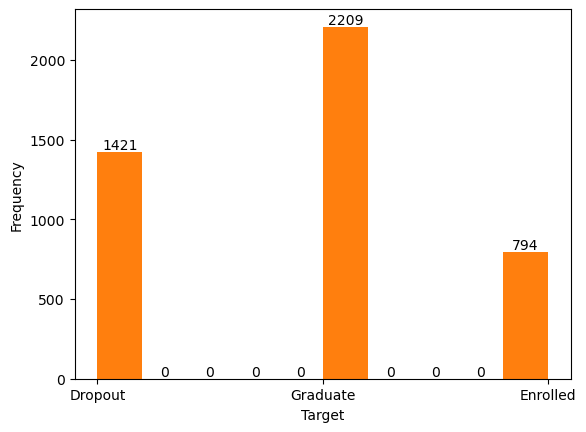

In [6]:
plt.hist(df['Target'], align="mid")
_, _, patches = plt.hist(df['Target'], align="mid")
plt.bar_label(patches)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [7]:
print("The % of Dropout in the dataset is: " + str((df['Target'].value_counts()['Dropout']/len(df['Target'])) *100) + "%")
print("The % of Graduates in the dataset is: " + str((df['Target'].value_counts()['Graduate']/len(df['Target'])) *100) + "%")
print("The % of Enrolled in the dataset is: " + str((df['Target'].value_counts()['Enrolled']/len(df['Target'])) *100) + "%")

The % of Dropout in the dataset is: 32.120253164556964%
The % of Graduates in the dataset is: 49.93218806509946%
The % of Enrolled in the dataset is: 17.94755877034358%


#### Mean, Median, and Range of continuous values

In [8]:
cont_val_df = df[['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']]
mean = cont_val_df.mean()
median = cont_val_df.median()
val_range = (cont_val_df.min(), cont_val_df.max())

header = ["", "Mean", "Median", "Min - Max"]
table = []

for i in range(len(mean.index)):
    table.append([mean.index[i], mean[i],median[i], str(val_range[0][i]) + " - " +  str(val_range[1][i])])
print(tabulate(table, headers=header, tablefmt="psql"))

+----------------------------------+--------------+----------+--------------------------+
|                                  |         Mean |   Median | Min - Max                |
|----------------------------------+--------------+----------+--------------------------|
| Previous qualification (grade)   | 132.613      | 133.1    | 95.0 - 190.0             |
| Admission grade                  | 126.978      | 126.1    | 95.0 - 190.0             |
| Curricular units 1st sem (grade) |  10.6408     |  12.2857 | 0.0 - 18.875             |
| Curricular units 2nd sem (grade) |  10.2302     |  12.2    | 0.0 - 18.571428571428573 |
| Unemployment rate                |  11.5661     |  11.1    | 7.6 - 16.2               |
| Inflation rate                   |   1.22803    |   1.4    | -0.8 - 3.7               |
| GDP                              |   0.00196881 |   0.32   | -4.06 - 3.51             |
+----------------------------------+--------------+----------+--------------------------+


#### Correlation Heat Matrix

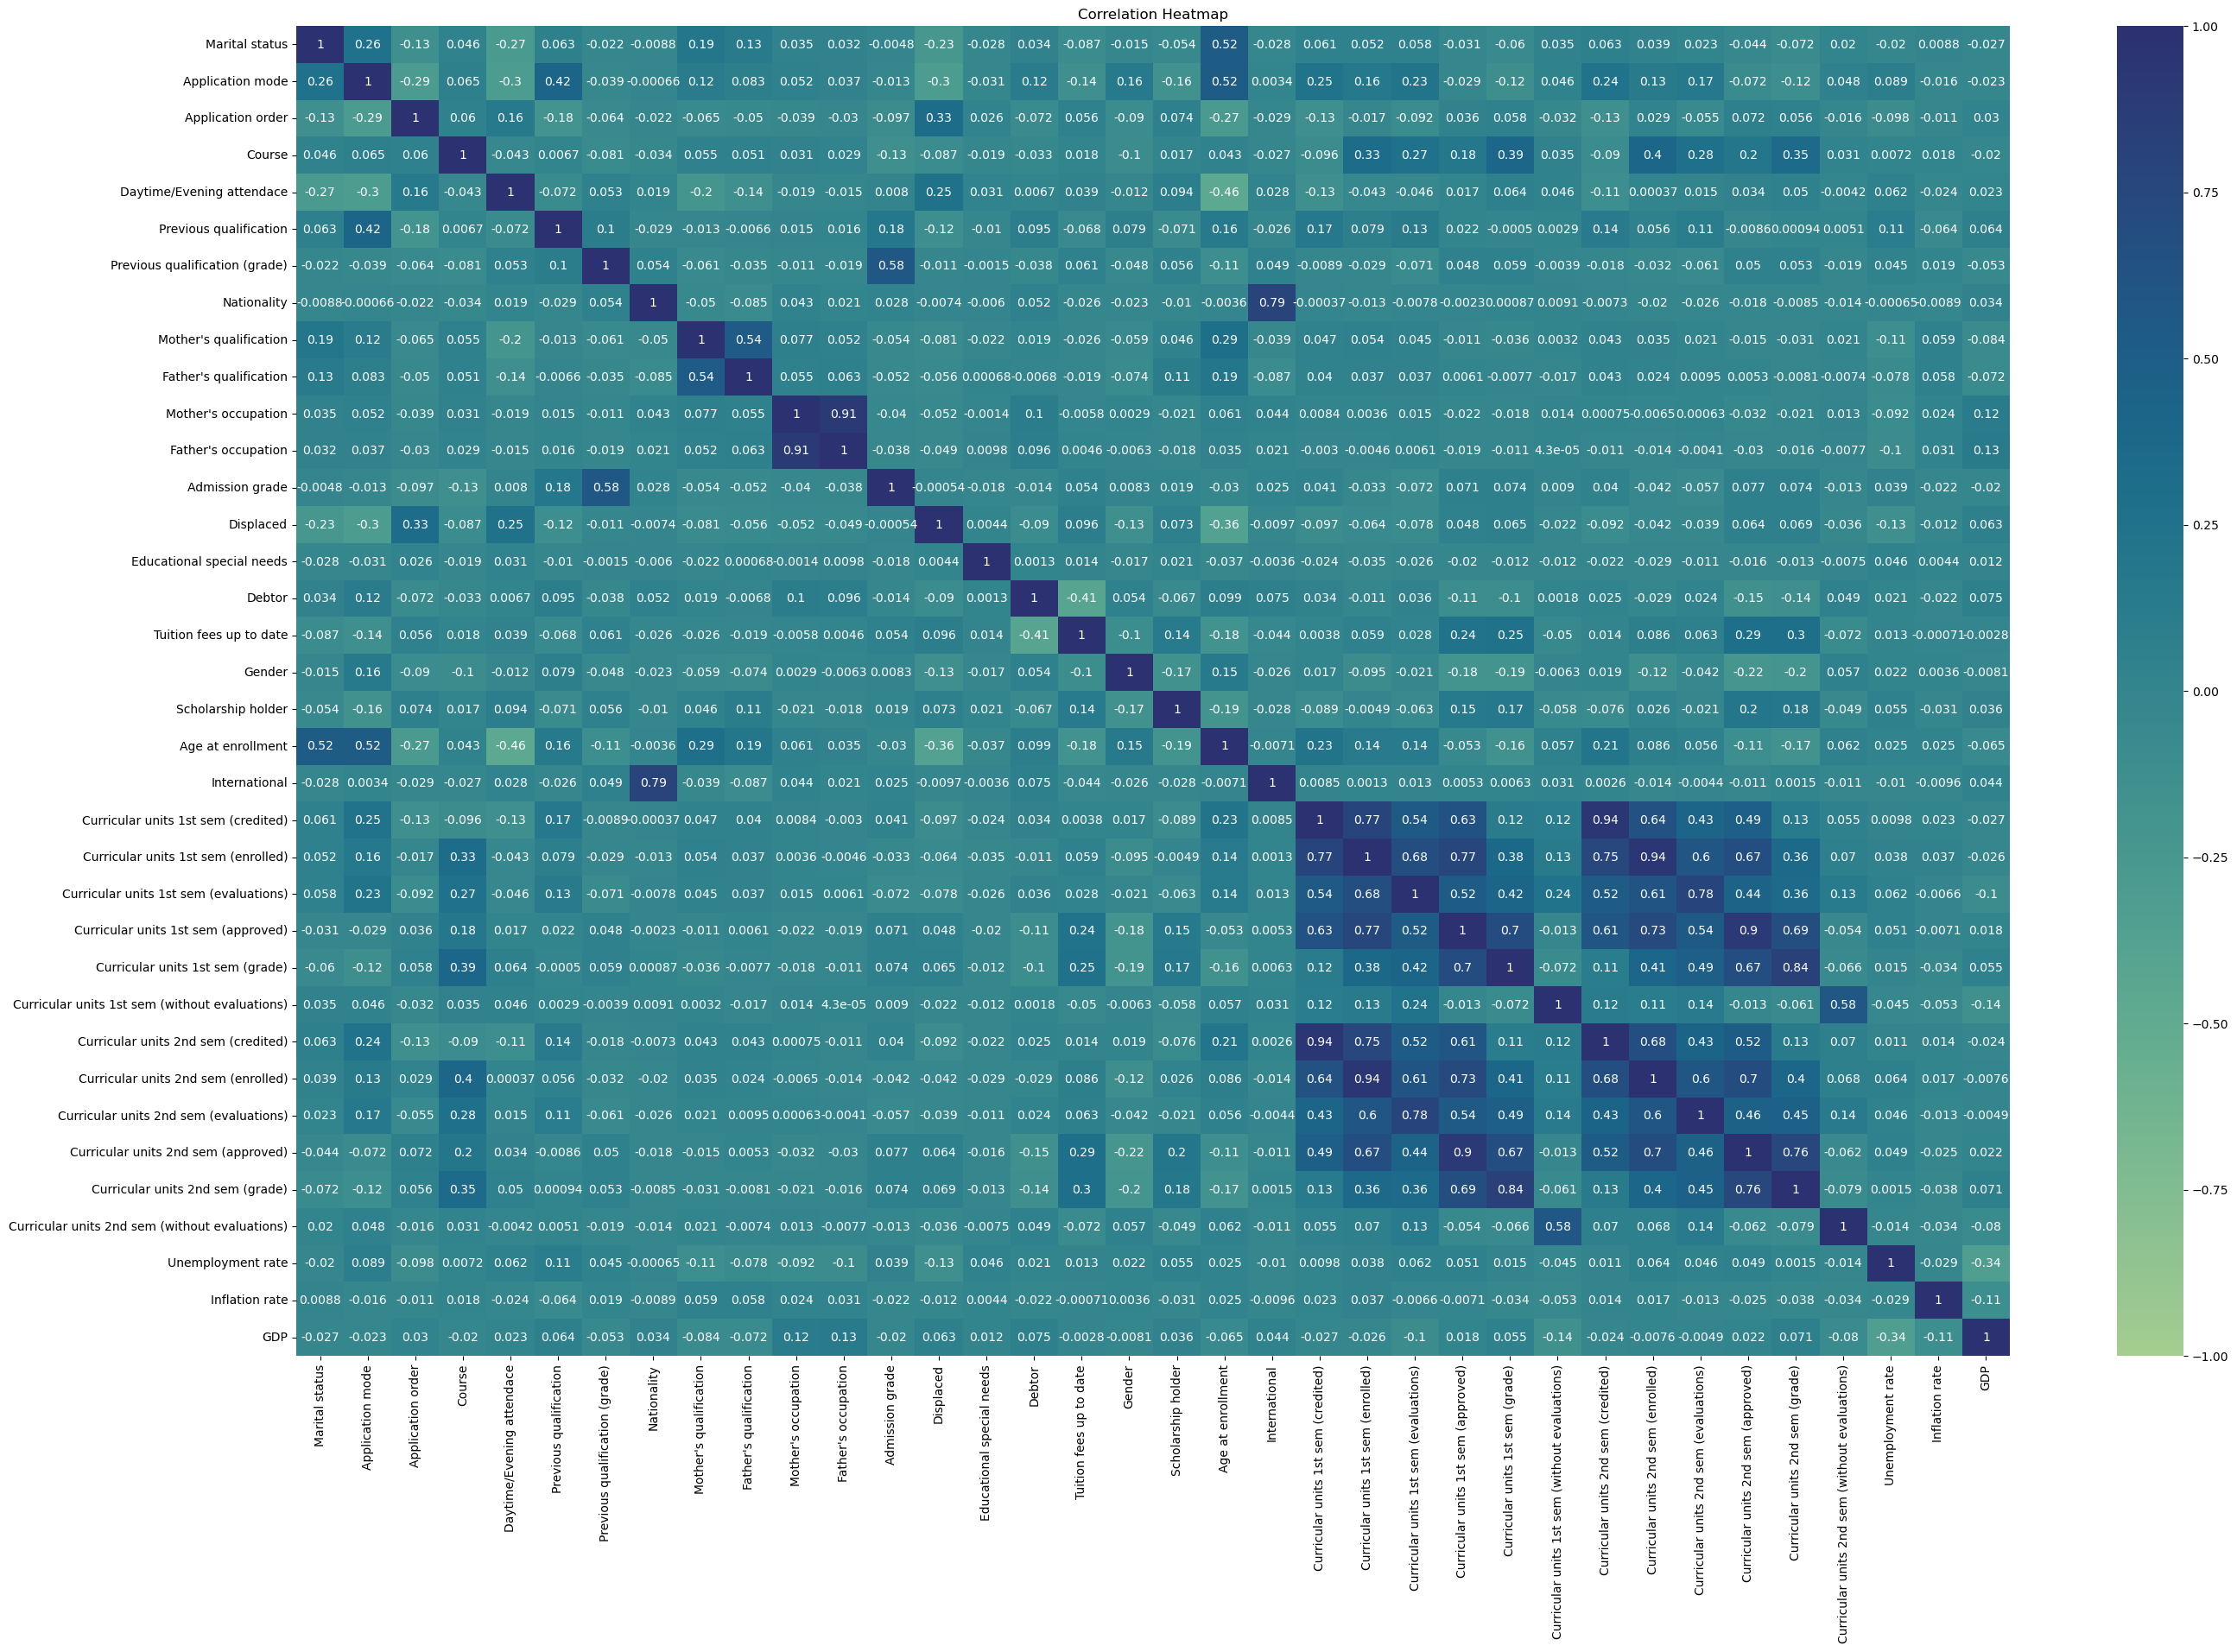

In [9]:
plt.figure(figsize=(32, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap')
plt.show()

# Dataset Preparation

#### Applying One-hot-encoding to categorical columns

In [10]:
OHE_df = pd.get_dummies(df, columns = ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nationality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation'])
OHE_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

In [11]:
print("No. of columns of One-hot-encoded dataset: " + str(len(OHE_df.columns)) + "\nNo. of columns of original dataset: " + str(len(df.columns)))

No. of columns of One-hot-encoded dataset: 248
No. of columns of original dataset: 37


In [12]:
len(df)

4424

#### Normalizing the continuous values of the dataset using minmax scaler

In [13]:
mms = MinMaxScaler()
continuous_val_columns = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
OHE_df[continuous_val_columns] = mms.fit_transform(OHE_df[continuous_val_columns])

In [14]:
OHE_df

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

# Dataset Splitting
### 70% train 15% validation 15% test -> only used for feature selection
#### 85% Train 15% Test would be used in GridSearch (Train and Validation set combined for training)

In [15]:
OHE_train_df, OHE_val_df, OHE_test_df = np.split(OHE_df.sample(frac=1, random_state=16),[int(0.7*len(OHE_df)), int(0.85*len(OHE_df))])

print("train_df len: " + str(len(OHE_train_df)) + "\nval_df len: " + str(len(OHE_val_df)) + "\ntest_df len: " + str(len(OHE_test_df)))

train_df len: 3096
val_df len: 664
test_df len: 664


In [16]:
OHE_train_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

In [17]:
OHE_val_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

In [18]:
OHE_test_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

# Feature Selection

In [19]:
#Separate the features (X) and target labels (y) for each dataset
X_train = OHE_train_df.drop(columns=['Target'])
y_train = OHE_train_df['Target']

X_val = OHE_val_df.drop(columns=['Target'])
y_val = OHE_val_df['Target']

X_test = OHE_test_df.drop(columns=['Target'])
y_test = OHE_test_df['Target']

In [20]:
X_train.shape

(3096, 247)

In [21]:
X_train.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occu

#### LDA

In [22]:
#fit the LDA model on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# transform the training, validation, and test data using LDA model
X_train_lda = lda.transform(X_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

In [23]:
# retrieve the coefficients for both discriminant functions
coefficients_1 = lda.coef_[0]  # coefficients for the 1st discriminant function
coefficients_2 = lda.coef_[1]  # coefficients for the 2nd discriminant function

# aggregate the coefficients through getting the average
aggregate_coefficients = (np.abs(coefficients_1) + np.abs(coefficients_2)) / 2

sorted_indices = np.argsort(aggregate_coefficients)[::-1] #descending order

# select the top N features 
top_n_indices = sorted_indices[:15] # set N ot 15
top_n_feature_names = X_train.columns[top_n_indices]

# create new dataframes with only the top N features
X_train_top_lda = X_train[top_n_feature_names]
X_val_top_lda = X_val[top_n_feature_names]
X_test_top_lda = X_test[top_n_feature_names]

# display the top N features and their aggregated coefficients
top_features = pd.DataFrame({
    'Feature': top_n_feature_names,
    'Aggregate Coefficient': aggregate_coefficients[top_n_indices]
})
print(top_features)

                    Feature  Aggregate Coefficient
0   Mother's occupation_131              11.158303
1   Mother's occupation_173              10.868963
2   Mother's occupation_194               9.751331
3   Father's occupation_154               9.615376
4   Father's occupation_131               9.529158
5   Father's occupation_143               9.529085
6   Father's occupation_174               9.440609
7   Father's occupation_194               9.315093
8   Father's occupation_195               9.107759
9   Mother's occupation_191               8.994011
10  Father's occupation_182               8.972495
11  Mother's occupation_152               8.850131
12  Mother's occupation_122               8.738317
13  Mother's occupation_144               8.708636
14  Mother's occupation_141               8.513746


In [24]:
y_train_lda = y_train.reset_index()
labels = y_train_lda.iloc[:,1:].values

labelss = [0]*3096

i = 0

for ctr in labels:
    if ctr == 'Dropout':
        labelss[i] = 0
        i+=1
    if ctr == 'Enrolled':
        labelss[i] = 1
        i+=1
    if ctr == 'Graduate':
        labelss[i] = 2
        i+=1

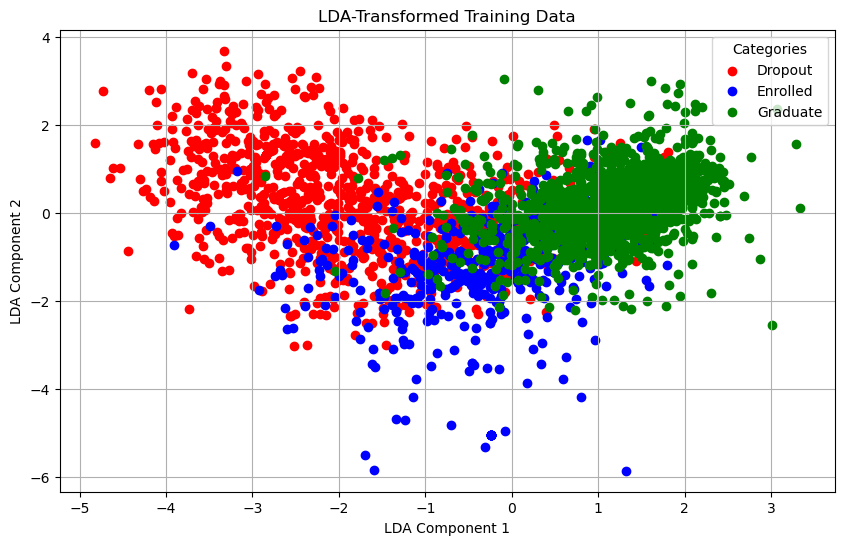

In [25]:
categories = np.unique(labelss)
category_labels = ['Dropout', 'Enrolled', 'Graduate']
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

plt.figure(figsize=(10, 6))
scatter_handles = []

for category, label in zip(categories, category_labels):
    #filter data points per category
    X_category = X_train_lda[labelss == category]
    
    scatter = plt.scatter(X_category[:, 0], X_category[:, 1], label=label, color=color_mapping[category])
    
    #for legend
    scatter_handles.append(scatter)


plt.title('LDA-Transformed Training Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
legend = plt.legend(category_labels, loc='upper right')
legend.set_title('Categories')
plt.show()


#### Forward Selection

In [26]:
selected_features_fs = []
best_score = 0
best_model = None
rank =0

print(f"Top Features and the Set's Validation Accuracy")
while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features_fs:
            # create a subset of features with the new feature
            features_to_use = selected_features_fs + [feature]
            X_train_subset = X_train[features_to_use]
            X_val_subset = X_val[features_to_use]

            # train a logistic regression model
            model = LogisticRegression(max_iter =5000)
            model.fit(X_train_subset, y_train)

            # evaluate the model's accuracy on the validation set
            y_val_pred = model.predict(X_val_subset)
            score = accuracy_score(y_val, y_val_pred)

            if score > best_score:
                best_score = score
                best_feature = feature
                best_model = model
    
    if best_feature is not None:
        selected_features_fs.append(best_feature)
        rank = rank + 1
        print(f"{rank}. {best_feature}: {best_score:.4f}")
    else:
        # if there is no improvement, stop the loop
        break

# # evaluate the final model on the test set
# X_test_subset = X_test[selected_features_fs]
# y_test_pred = best_model.predict(X_test_subset)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy with Selected Features: {test_accuracy:.4f}")

# created datasets using the selected features after performing forward selection
X_train_fs = X_train[selected_features_fs]
X_val_fs = X_val[selected_features_fs]
X_test_fs = X_test[selected_features_fs]



Top Features and the Set's Validation Accuracy
1. Curricular units 2nd sem (approved): 0.7229
2. Tuition fees up to date: 0.7349
3. Curricular units 2nd sem (enrolled): 0.7545
4. Application mode_39: 0.7605
5. Curricular units 1st sem (approved): 0.7636
6. Course_171: 0.7711
7. Father's qualification_38: 0.7786
8. Course_9130: 0.7801
9. Course_9119: 0.7831
10. Course_9238: 0.7846
11. Marital status_4: 0.7861
12. Course_9254: 0.7877
13. Father's occupation_3: 0.7907
14. International: 0.7922
15. Application mode_53: 0.7937


#### Decision-tree

In [27]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
importances = tree_clf.feature_importances_
total_importance = sum(importances)
feature_importance_percentages = [importance / total_importance * 100 for importance in importances]
feature_importance_tuples = [(i, importance) for i, importance in enumerate(feature_importance_percentages)]

feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# get the indices of the top N important features
top_n_features = [index for index, _ in feature_importance_tuples[:15]] # N set to 15

#created datasets using the selected features from the decision tree
X_train_top_dt = X_train.iloc[:, top_n_features]
X_val_top_dt = X_val.iloc[:, top_n_features]
X_test_top_dt = X_test.iloc[:, top_n_features]

print("Feature rankings:")
for rank, (index, importance_percentage) in enumerate(feature_importance_tuples[:15], start=1):
    feature_name = X_train.columns[index]
    print(f"{rank}. {feature_name}: {importance_percentage:.2f}%")
    
# Predict on the test data
y_test_pred = tree_clf.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Selected Features: {test_accuracy:.4f}")

Feature rankings:
1. Curricular units 2nd sem (approved): 34.13%
2. Admission grade: 4.73%
3. Tuition fees up to date: 4.52%
4. Curricular units 2nd sem (grade): 4.12%
5. Curricular units 2nd sem (enrolled): 3.81%
6. Curricular units 1st sem (grade): 3.70%
7. Previous qualification (grade): 3.67%
8. Curricular units 1st sem (approved): 2.94%
9. Curricular units 1st sem (evaluations): 2.54%
10. Age at enrollment: 2.51%
11. Curricular units 2nd sem (evaluations): 2.37%
12. GDP: 2.22%
13. Inflation rate: 2.14%
14. Application order: 1.59%
15. Curricular units 1st sem (enrolled): 1.28%
Test Accuracy with Selected Features: 0.7289


#### PCA

In [28]:
mms = MinMaxScaler()
X_scaled = OHE_df.drop(columns=['Target']) #only used for visualization
X_train_scaled = X_train
X_val_scaled = X_val
X_test_scaled = X_test

# #no need? because mms was already performed in OHE_df
# continuous_val_columns = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
# X_scaled[continuous_val_columns] = mms.fit_transform(OHE_df[continuous_val_columns])
# X_train_scaled[continuous_val_columns] = mms.fit_transform(X_train[continuous_val_columns])
# X_val_scaled[continuous_val_columns] = mms.fit_transform(X_val[continuous_val_columns])
# X_test_scaled[continuous_val_columns] = mms.fit_transform(X_test[continuous_val_columns])

pca = PCA(n_components = 0.95) #95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.fit_transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.4681897 , 0.31895899, 0.075034  , 0.03314645, 0.02030237,
       0.01518853, 0.0097153 , 0.00651041, 0.00579776])

# Machine Learning Models

In [29]:
def bestGridSearchModel(model, grid_search_parameters, X_train, y_train):
    os.environ["PYTHONWARNINGS"] = "ignore" #ignore all warnings from gridsearch
    grid_search = GridSearchCV(estimator= model, param_grid = gridsearch_parameters, cv= 5, error_score='raise', n_jobs=-1, verbose=True, scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'], refit='f1_weighted')
    grid_search.fit(X_train, y_train)
    cv_results = pd.DataFrame(grid_search.cv_results_)
    best_model_cv_results = cv_results.loc[grid_search.best_index_]
    os.environ["PYTHONWARNINGS"] = "default" #set python warnings back to default
    
    return grid_search.best_estimator_, best_model_cv_results

In [30]:
def printAndCalcMetrics(y_test, y_pred, best_model_cv_results, model_name, dataset_name):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Dropout', 'Enrolled', 'Graduate'])
    cm_display.plot()
    plt.show()
    
    pred_accuracy = round(accuracy_score(y_test, y_pred),3)
    pred_precision = round(precision_score(y_test, y_pred, average='weighted', zero_division=0),3)
    pred_recall_score = round(recall_score(y_test, y_pred, average='weighted', zero_division=0),3)
    pred_f1_score = round(f1_score(y_test, y_pred, average='weighted', zero_division=0),3)
    
    print('\033[1m' + 'Metrics of ' + model_name + ' model on Test Set of ' + dataset_name)
    print('Accuracy: %.3f' % pred_accuracy)
    print('Precision: %.3f' % pred_precision)
    print('Recall: %.3f' % pred_recall_score)
    print('F-measure: %.3f' % pred_f1_score)
    
    print('\nMetrics of ' + model_name + ' model on 5-Fold Cross Validation from Training Set of ' + dataset_name)
    print('Mean Accuracy: %.3f' % best_model_cv_results['mean_test_accuracy'])
    print('Mean Precision: %.3f' % best_model_cv_results['mean_test_precision_weighted'])
    print('Mean Recall: %.3f' % best_model_cv_results['mean_test_recall_weighted'])
    print('Mean F-measure: %.3f' % best_model_cv_results['mean_test_f1_weighted'])

    return {'accuracy': pred_accuracy, 'precision': pred_precision, 'recall':pred_recall_score, 'fmeasure':pred_f1_score}
    

### Supervised Learning Model
### Order of test => FULL FEATURES, LDA, FORWARD SEARCH, DECISION TREE, PCA 

#### Combine test and validate to be used for gridsearch's 5-fold cross validation

In [31]:
X_train_combined = pd.concat([X_train, X_val], axis=0, ignore_index=False)
X_train_lda_combined = np.concatenate((X_train_top_lda, X_val_top_lda), axis=0)
X_train_fs_combined = pd.concat([X_train_fs, X_val_fs], axis=0, ignore_index=False)
X_train_dt_combined = pd.concat([X_train_top_dt, X_val_top_dt], axis=0, ignore_index=False)
X_train_pca_combined = np.concatenate((X_train_pca, X_val_pca), axis=0)

y_train_combined = pd.concat([y_train,y_val], axis=0, ignore_index=False)

In [32]:
train_feature_sets = {'full': X_train_combined, 'lda': X_train_lda_combined, 'forward_search': X_train_fs_combined, 'decision_tree': X_train_dt_combined, 'pca': X_train_pca_combined}

In [33]:
test_feature_sets = {'full': X_test, 'lda': X_test_top_lda, 'forward_search': X_test_fs, 'decision_tree': X_test_top_dt, 'pca': X_test_pca}

#### SVM

In [34]:
SVM_results = [] #to store the results of each model when ran with different features of the dataset

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Parameters used: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 5000}


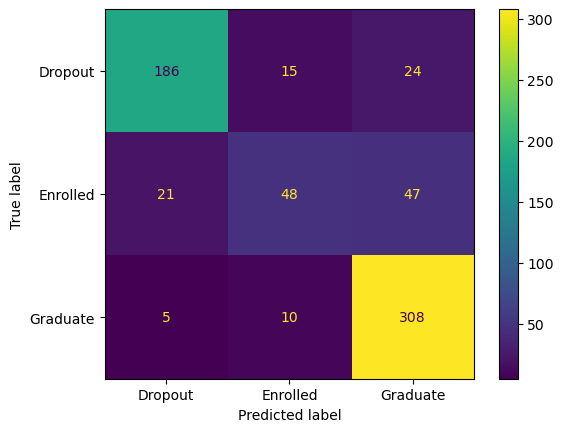

Metrics of Support Vector Machine model on Test Set of full
Accuracy: 0.816
Precision: 0.807
Recall: 0.816
F-measure: 0.804

Metrics of Support Vector Machine model on 5-Fold Cross Validation from Training Set of full
Mean Accuracy: 0.772
Mean Precision: 0.762
Mean Recall: 0.772
Mean F-measure: 0.761
Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Parameters used: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 5000}


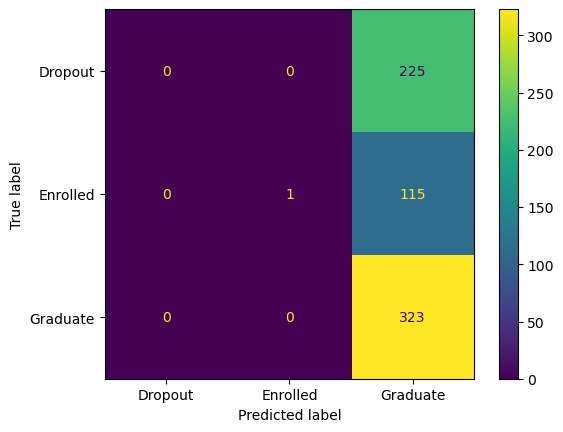

Metrics of Support Vector Machine model on Test Set of lda
Accuracy: 0.488
Precision: 0.412
Recall: 0.488
F-measure: 0.322

Metrics of Support Vector Machine model on 5-Fold Cross Validation from Training Set of lda
Mean Accuracy: 0.501
Mean Precision: 0.299
Mean Recall: 0.501
Mean F-measure: 0.339
Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Parameters used: {'C': 50, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 5000}


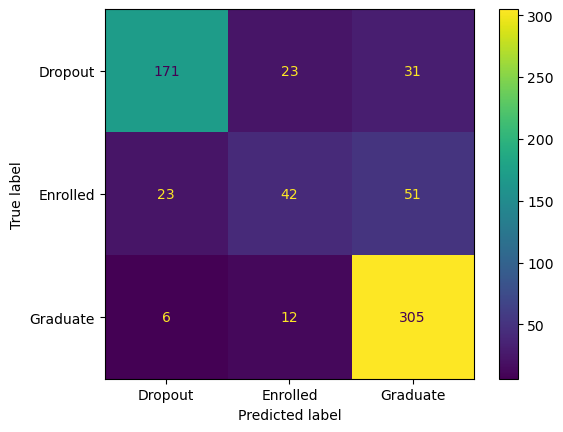

Metrics of Support Vector Machine model on Test Set of forward_search
Accuracy: 0.780
Precision: 0.768
Recall: 0.780
F-measure: 0.767

Metrics of Support Vector Machine model on 5-Fold Cross Validation from Training Set of forward_search
Mean Accuracy: 0.757
Mean Precision: 0.745
Mean Recall: 0.757
Mean F-measure: 0.743
Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Parameters used: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 5000}


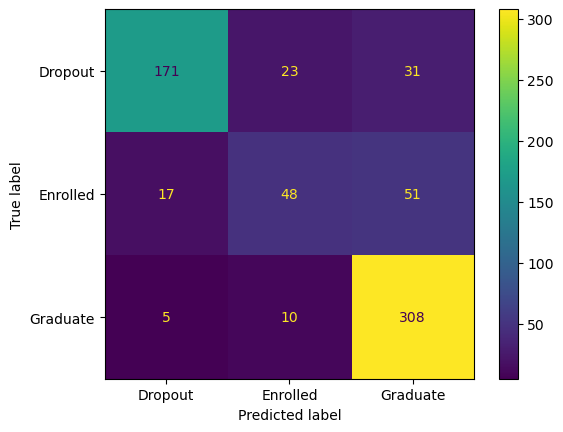

Metrics of Support Vector Machine model on Test Set of decision_tree
Accuracy: 0.794
Precision: 0.788
Recall: 0.794
F-measure: 0.783

Metrics of Support Vector Machine model on 5-Fold Cross Validation from Training Set of decision_tree
Mean Accuracy: 0.752
Mean Precision: 0.743
Mean Recall: 0.752
Mean F-measure: 0.739
Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Parameters used: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 5000}


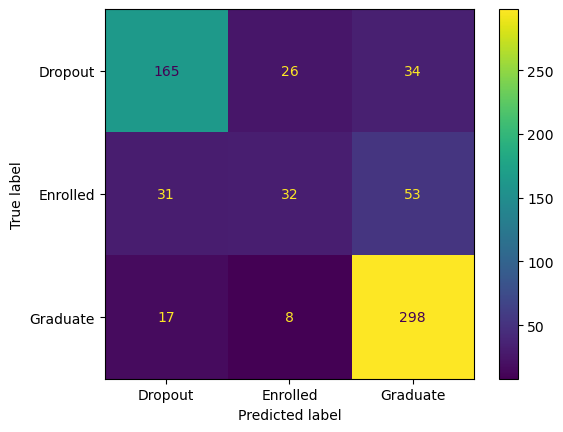

Metrics of Support Vector Machine model on Test Set of pca
Accuracy: 0.745
Precision: 0.724
Recall: 0.745
F-measure: 0.726

Metrics of Support Vector Machine model on 5-Fold Cross Validation from Training Set of pca
Mean Accuracy: 0.728
Mean Precision: 0.712
Mean Recall: 0.728
Mean F-measure: 0.711


In [35]:
gridsearch_parameters = [
    {'C' : [0.1, 1, 10, 50, 100, 150],
     'kernel': ['poly', 'rbf', 'sigmoid'],
     'gamma': ['scale', 'auto'],
     'max_iter':[5000]
    }
]

for key,value in train_feature_sets.items():
    svm_model = SVC()
    grid_search_svm_model, best_svm_model_cv_results = bestGridSearchModel(svm_model, gridsearch_parameters, value, y_train_combined)
    svm_y_pred = grid_search_svm_model.predict(test_feature_sets[key])
    print(f'Parameters used: {best_svm_model_cv_results.params}')
    SVM_results.append(printAndCalcMetrics(y_test, svm_y_pred, best_svm_model_cv_results, "Support Vector Machine", key))

In [36]:
SVM_results

[{'accuracy': 0.816, 'precision': 0.807, 'recall': 0.816, 'fmeasure': 0.804},
 {'accuracy': 0.488, 'precision': 0.412, 'recall': 0.488, 'fmeasure': 0.322},
 {'accuracy': 0.78, 'precision': 0.768, 'recall': 0.78, 'fmeasure': 0.767},
 {'accuracy': 0.794, 'precision': 0.788, 'recall': 0.794, 'fmeasure': 0.783},
 {'accuracy': 0.745, 'precision': 0.724, 'recall': 0.745, 'fmeasure': 0.726}]

#### Multilayered Perceptron

In [37]:
MLP_results = []

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters used: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}


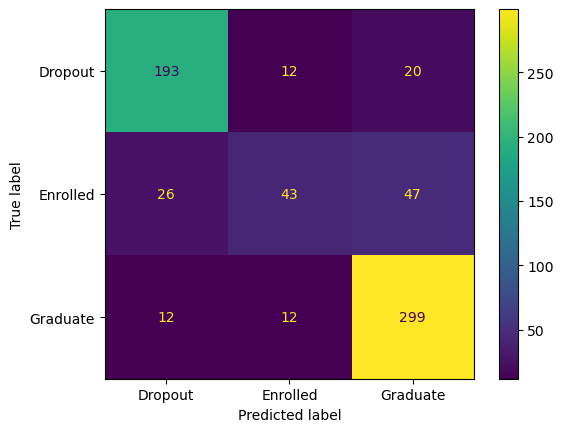

Metrics of Multi-layered Perceptron model on Test Set of full
Accuracy: 0.806
Precision: 0.793
Recall: 0.806
F-measure: 0.791

Metrics of Multi-layered Perceptron model on 5-Fold Cross Validation from Training Set of full
Mean Accuracy: 0.769
Mean Precision: 0.756
Mean Recall: 0.769
Mean F-measure: 0.758
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters used: {'activation': 'identity', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


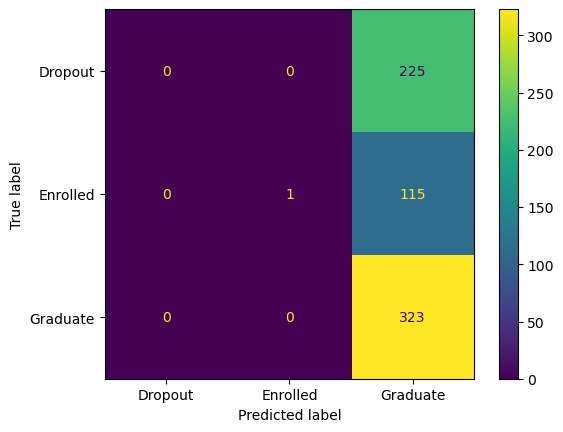

Metrics of Multi-layered Perceptron model on Test Set of lda
Accuracy: 0.488
Precision: 0.412
Recall: 0.488
F-measure: 0.322

Metrics of Multi-layered Perceptron model on 5-Fold Cross Validation from Training Set of lda
Mean Accuracy: 0.500
Mean Precision: 0.301
Mean Recall: 0.500
Mean F-measure: 0.340
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters used: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


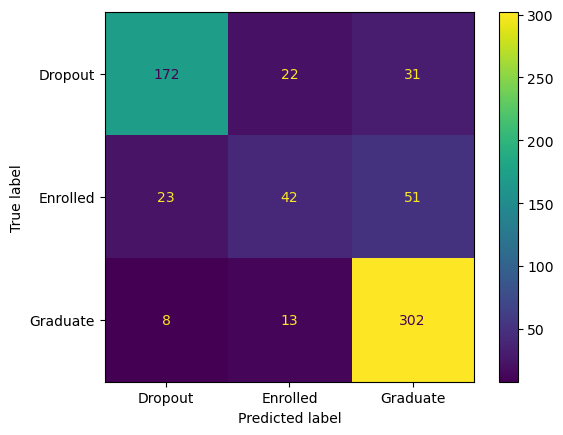

Metrics of Multi-layered Perceptron model on Test Set of forward_search
Accuracy: 0.777
Precision: 0.765
Recall: 0.777
F-measure: 0.764

Metrics of Multi-layered Perceptron model on 5-Fold Cross Validation from Training Set of forward_search
Mean Accuracy: 0.757
Mean Precision: 0.748
Mean Recall: 0.757
Mean F-measure: 0.746
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters used: {'activation': 'logistic', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


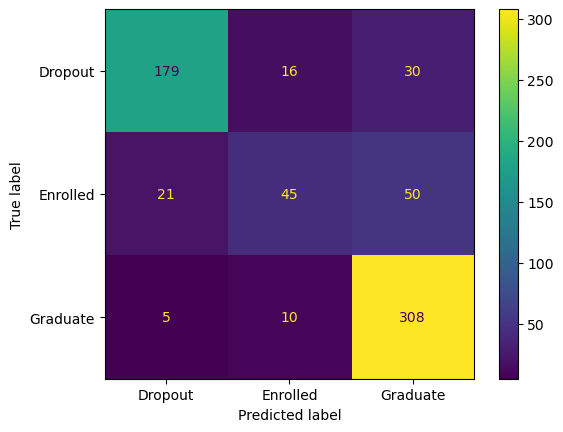

Metrics of Multi-layered Perceptron model on Test Set of decision_tree
Accuracy: 0.801
Precision: 0.793
Recall: 0.801
F-measure: 0.788

Metrics of Multi-layered Perceptron model on 5-Fold Cross Validation from Training Set of decision_tree
Mean Accuracy: 0.766
Mean Precision: 0.753
Mean Recall: 0.766
Mean F-measure: 0.753
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters used: {'activation': 'logistic', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


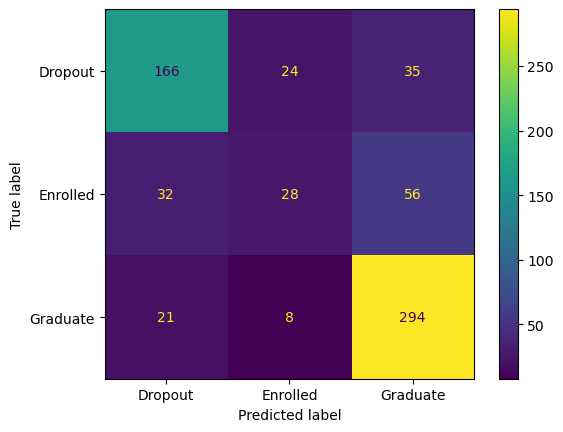

Metrics of Multi-layered Perceptron model on Test Set of pca
Accuracy: 0.735
Precision: 0.710
Recall: 0.735
F-measure: 0.713

Metrics of Multi-layered Perceptron model on 5-Fold Cross Validation from Training Set of pca
Mean Accuracy: 0.737
Mean Precision: 0.721
Mean Recall: 0.737
Mean F-measure: 0.723


In [38]:
gridsearch_parameters = [
    {'hidden_layer_sizes': [(50,50)],
     'activation': ['identity','logistic','tanh', 'relu'],
     'solver': ['lbfgs','sgd', 'adam'],
     'learning_rate': ['adaptive'],
     'max_iter':[1000]
    }
]

for key,value in train_feature_sets.items():
    mlp_model = MLPClassifier()
    grid_search_mlp_model, best_mlp_model_cv_results = bestGridSearchModel(mlp_model, gridsearch_parameters, value, y_train_combined)
    mlp_y_pred = grid_search_mlp_model.predict(test_feature_sets[key])
    print(f'Parameters used: {best_mlp_model_cv_results.params}')
    MLP_results.append(printAndCalcMetrics(y_test, mlp_y_pred, best_mlp_model_cv_results, "Multi-layered Perceptron", key))

In [39]:
MLP_results

[{'accuracy': 0.806, 'precision': 0.793, 'recall': 0.806, 'fmeasure': 0.791},
 {'accuracy': 0.488, 'precision': 0.412, 'recall': 0.488, 'fmeasure': 0.322},
 {'accuracy': 0.777, 'precision': 0.765, 'recall': 0.777, 'fmeasure': 0.764},
 {'accuracy': 0.801, 'precision': 0.793, 'recall': 0.801, 'fmeasure': 0.788},
 {'accuracy': 0.735, 'precision': 0.71, 'recall': 0.735, 'fmeasure': 0.713}]

#### KNN

In [40]:
KNN_results = []

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Parameters used: {'n_neighbors': 20, 'p': 1}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


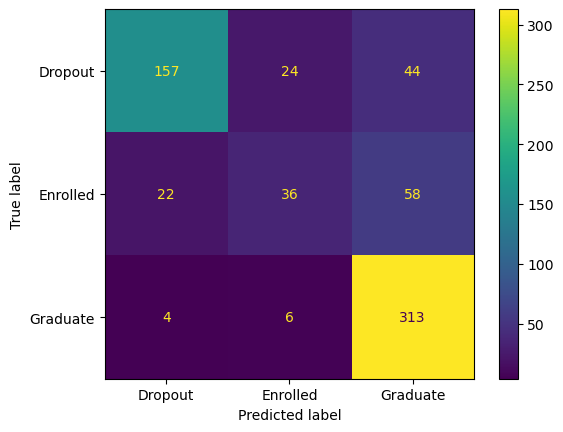

Metrics of K-Nearest Neighbor model on Test Set of full
Accuracy: 0.762
Precision: 0.753
Recall: 0.762
F-measure: 0.743

Metrics of K-Nearest Neighbor model on 5-Fold Cross Validation from Training Set of full
Mean Accuracy: 0.739
Mean Precision: 0.728
Mean Recall: 0.739
Mean F-measure: 0.715
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Parameters used: {'n_neighbors': 53, 'p': 1}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


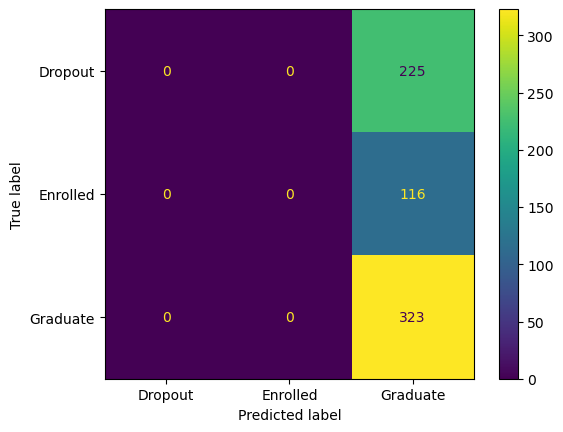

Metrics of K-Nearest Neighbor model on Test Set of lda
Accuracy: 0.486
Precision: 0.237
Recall: 0.486
F-measure: 0.318

Metrics of K-Nearest Neighbor model on 5-Fold Cross Validation from Training Set of lda
Mean Accuracy: 0.502
Mean Precision: 0.252
Mean Recall: 0.502
Mean F-measure: 0.335
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Parameters used: {'n_neighbors': 10, 'p': 2}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


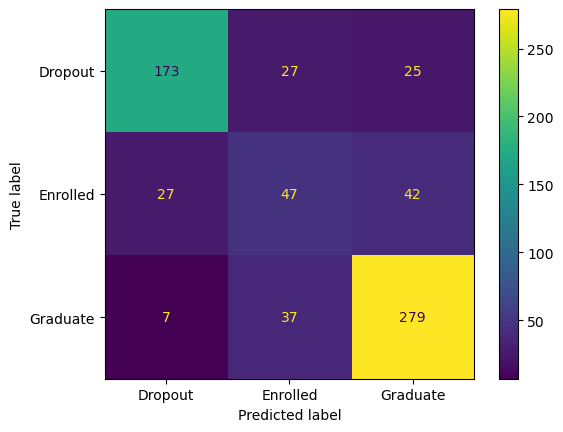

Metrics of K-Nearest Neighbor model on Test Set of forward_search
Accuracy: 0.752
Precision: 0.749
Recall: 0.752
F-measure: 0.749

Metrics of K-Nearest Neighbor model on 5-Fold Cross Validation from Training Set of forward_search
Mean Accuracy: 0.750
Mean Precision: 0.741
Mean Recall: 0.750
Mean F-measure: 0.743
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Parameters used: {'n_neighbors': 17, 'p': 1}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


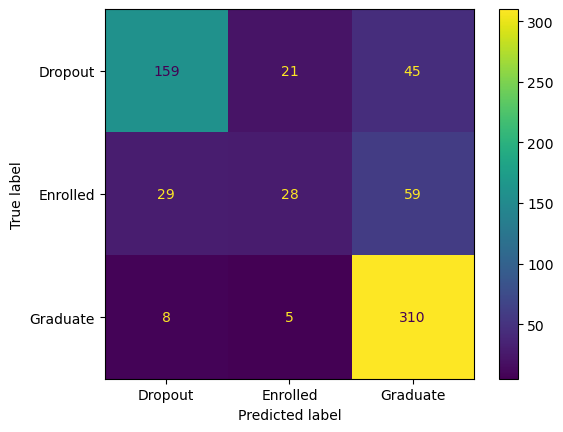

Metrics of K-Nearest Neighbor model on Test Set of decision_tree
Accuracy: 0.748
Precision: 0.730
Recall: 0.748
F-measure: 0.723

Metrics of K-Nearest Neighbor model on 5-Fold Cross Validation from Training Set of decision_tree
Mean Accuracy: 0.741
Mean Precision: 0.727
Mean Recall: 0.741
Mean F-measure: 0.721
Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Parameters used: {'n_neighbors': 7, 'p': 1}


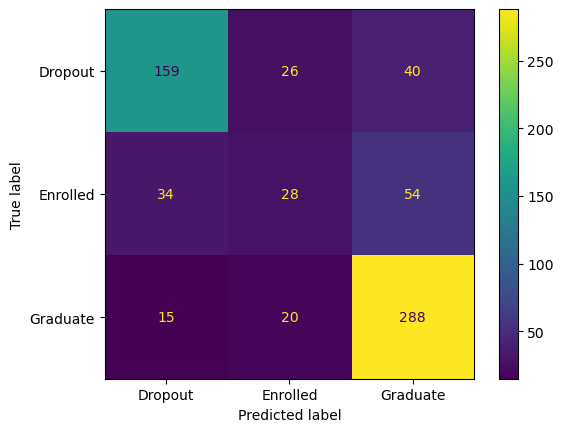

Metrics of K-Nearest Neighbor model on Test Set of pca
Accuracy: 0.715
Precision: 0.692
Recall: 0.715
F-measure: 0.698

Metrics of K-Nearest Neighbor model on 5-Fold Cross Validation from Training Set of pca
Mean Accuracy: 0.718
Mean Precision: 0.702
Mean Recall: 0.718
Mean F-measure: 0.705


In [41]:
gridsearch_parameters = [
    {'n_neighbors': list(range(1,61)),
     'p' : [1,2]
    }
]

for key,value in train_feature_sets.items():
    knn_model = KNeighborsClassifier()
    grid_search_knn_model, best_knn_model_cv_results = bestGridSearchModel(knn_model, gridsearch_parameters, value, y_train_combined)
    knn_y_pred = grid_search_knn_model.predict(test_feature_sets[key])
    print(f'Parameters used: {best_knn_model_cv_results.params}')
    KNN_results.append(printAndCalcMetrics(y_test, knn_y_pred, best_knn_model_cv_results, "K-Nearest Neighbor", key))

In [42]:
KNN_results

[{'accuracy': 0.762, 'precision': 0.753, 'recall': 0.762, 'fmeasure': 0.743},
 {'accuracy': 0.486, 'precision': 0.237, 'recall': 0.486, 'fmeasure': 0.318},
 {'accuracy': 0.752, 'precision': 0.749, 'recall': 0.752, 'fmeasure': 0.749},
 {'accuracy': 0.748, 'precision': 0.73, 'recall': 0.748, 'fmeasure': 0.723},
 {'accuracy': 0.715, 'precision': 0.692, 'recall': 0.715, 'fmeasure': 0.698}]

#### Decision Tree

In [43]:
DT_results = []

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameters used: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


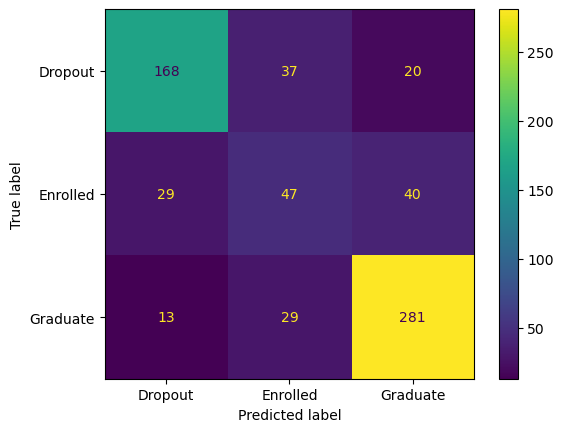

Metrics of Decision Tree model on Test Set of full
Accuracy: 0.747
Precision: 0.745
Recall: 0.747
F-measure: 0.745

Metrics of Decision Tree model on 5-Fold Cross Validation from Training Set of full
Mean Accuracy: 0.725
Mean Precision: 0.715
Mean Recall: 0.725
Mean F-measure: 0.718
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameters used: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


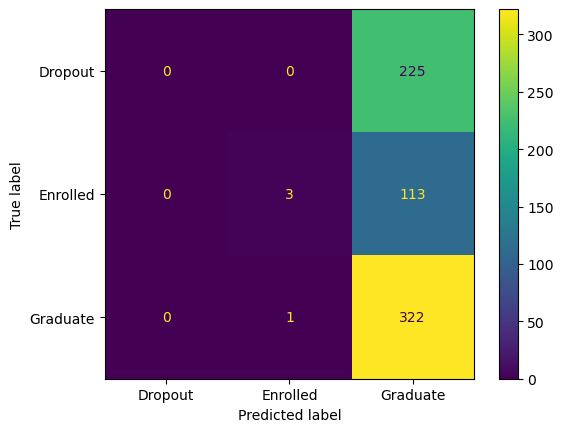

Metrics of Decision Tree model on Test Set of lda
Accuracy: 0.489
Precision: 0.368
Recall: 0.489
F-measure: 0.327

Metrics of Decision Tree model on 5-Fold Cross Validation from Training Set of lda
Mean Accuracy: 0.499
Mean Precision: 0.298
Mean Recall: 0.499
Mean F-measure: 0.339
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameters used: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10}


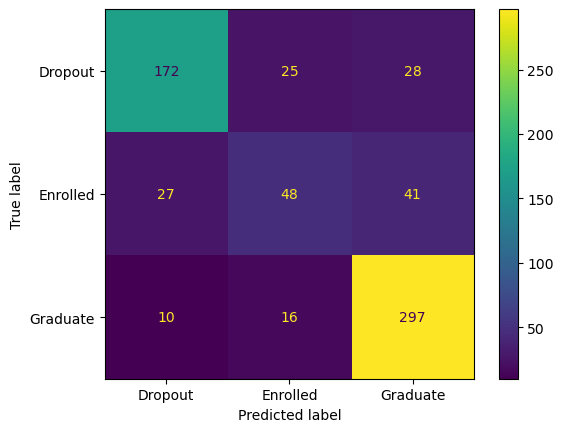

Metrics of Decision Tree model on Test Set of forward_search
Accuracy: 0.779
Precision: 0.768
Recall: 0.779
F-measure: 0.770

Metrics of Decision Tree model on 5-Fold Cross Validation from Training Set of forward_search
Mean Accuracy: 0.757
Mean Precision: 0.743
Mean Recall: 0.757
Mean F-measure: 0.745
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameters used: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}


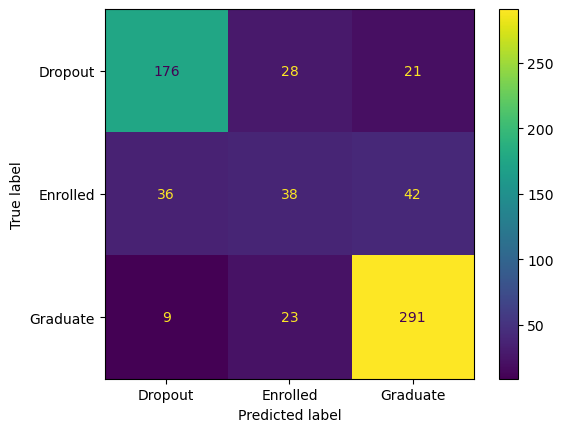

Metrics of Decision Tree model on Test Set of decision_tree
Accuracy: 0.761
Precision: 0.744
Recall: 0.761
F-measure: 0.750

Metrics of Decision Tree model on 5-Fold Cross Validation from Training Set of decision_tree
Mean Accuracy: 0.722
Mean Precision: 0.714
Mean Recall: 0.722
Mean F-measure: 0.716
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameters used: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}


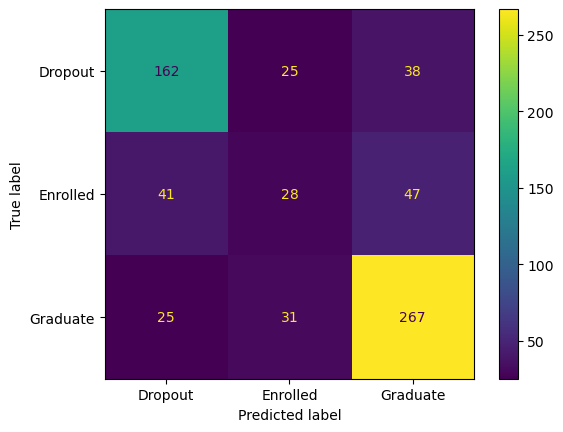

Metrics of Decision Tree model on Test Set of pca
Accuracy: 0.688
Precision: 0.668
Recall: 0.688
F-measure: 0.676

Metrics of Decision Tree model on 5-Fold Cross Validation from Training Set of pca
Mean Accuracy: 0.673
Mean Precision: 0.669
Mean Recall: 0.673
Mean F-measure: 0.669


In [44]:
gridsearch_parameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}]


for key, value in train_feature_sets.items():
    dt_model = DecisionTreeClassifier()
    grid_search_dt_model, best_dt_model_cv_results = bestGridSearchModel(dt_model, gridsearch_parameters, value, y_train_combined)
    dt_y_pred = grid_search_dt_model.predict(test_feature_sets[key])
    print(f'Parameters used: {best_dt_model_cv_results.params}')
    DT_results.append(printAndCalcMetrics(y_test, dt_y_pred, best_dt_model_cv_results, "Decision Tree", key))

In [45]:
DT_results

[{'accuracy': 0.747, 'precision': 0.745, 'recall': 0.747, 'fmeasure': 0.745},
 {'accuracy': 0.489, 'precision': 0.368, 'recall': 0.489, 'fmeasure': 0.327},
 {'accuracy': 0.779, 'precision': 0.768, 'recall': 0.779, 'fmeasure': 0.77},
 {'accuracy': 0.761, 'precision': 0.744, 'recall': 0.761, 'fmeasure': 0.75},
 {'accuracy': 0.688, 'precision': 0.668, 'recall': 0.688, 'fmeasure': 0.676}]

In [46]:
header = ["", "Full features", "LDA", "Forward Search", "Decision Tree", "PCA"]
metrics = ['accuracy', 'precision', 'recall', 'fmeasure']

for i in metrics:
    header[0] = i.capitalize()
    table = []
    row1,row2,row3, row4 = ["SVM"],["Multilayered Perceptron"],["KNN"],["Decision Tree"]
    for j in range(5):
        row1.append(SVM_results[j][i])
        row2.append(MLP_results[j][i])
        row3.append(KNN_results[j][i])
        row4.append(DT_results[j][i])
    table.append(row1)
    table.append(row2)
    table.append(row3)
    table.append(row4)
    print(tabulate(table, headers=header, tablefmt="psql"))

+-------------------------+-----------------+-------+------------------+-----------------+-------+
| Accuracy                |   Full features |   LDA |   Forward Search |   Decision Tree |   PCA |
|-------------------------+-----------------+-------+------------------+-----------------+-------|
| SVM                     |           0.816 | 0.488 |            0.78  |           0.794 | 0.745 |
| Multilayered Perceptron |           0.806 | 0.488 |            0.777 |           0.801 | 0.735 |
| KNN                     |           0.762 | 0.486 |            0.752 |           0.748 | 0.715 |
| Decision Tree           |           0.747 | 0.489 |            0.779 |           0.761 | 0.688 |
+-------------------------+-----------------+-------+------------------+-----------------+-------+
+-------------------------+-----------------+-------+------------------+-----------------+-------+
| Precision               |   Full features |   LDA |   Forward Search |   Decision Tree |   PCA |
|---------

### Unsupervised Learning Model

#### Self Organizing Map + K-Means Clustering

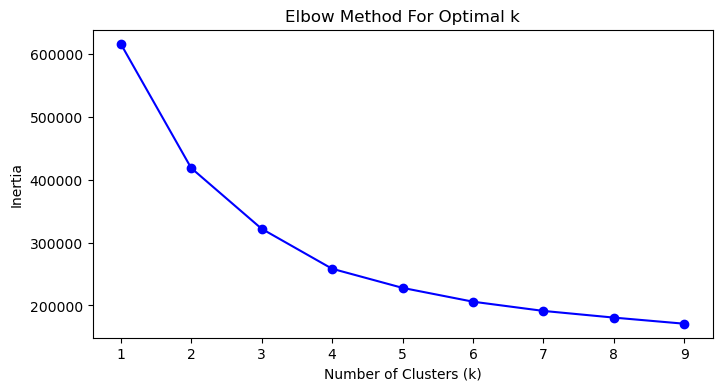

In [47]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans_df= OHE_df.copy()


# all features df
all_features_df = OHE_df.drop(columns=['Target'])

k_values = range(1, 10)

# calculate inertia for each k value
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(all_features_df)
    inertias.append(kmeans.inertia_)

# plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Optimal k according to DBI: 3 with a DBI of 0.9306259298146554


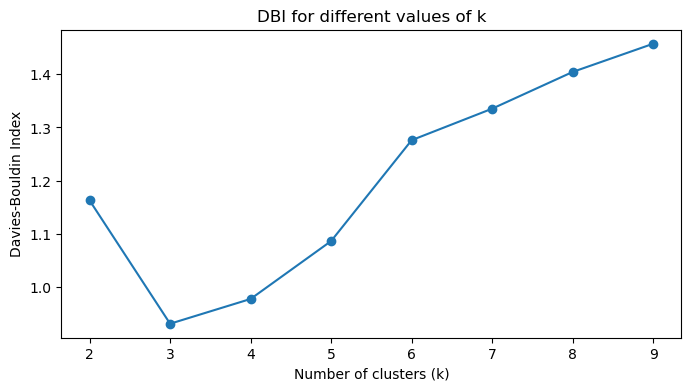

In [48]:
dbi_scores = []
k_values = range(2, 10)  # testing k values from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_features_df)
    dbi = davies_bouldin_score(all_features_df, kmeans.labels_)
    dbi_scores.append(dbi)

# get the k with the lowest DBI
optimal_k = k_values[np.argmin(dbi_scores)]
lowest_dbi = min(dbi_scores)

print(f"Optimal k according to DBI: {optimal_k} with a DBI of {lowest_dbi}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(k_values, dbi_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('DBI for different values of k')
plt.show()

Silhouette Score: 0.47730922295657024
         Previous qualification (grade)  Admission grade  \
Cluster                                                    
0                            130.120451       126.209774   
1                            133.122945       126.948174   
2                            132.111373       129.393333   

         Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
Cluster                                                                       
0                                8.677992                          7.819894   
1                               10.873323                         10.513081   
2                               12.564736                         12.628876   

         Unemployment rate  Inflation rate       GDP  
Cluster                                               
0                11.673233        1.265865 -0.228195  
1                11.561644        1.209161  0.058473  
2                11.348627        1.388627 -0

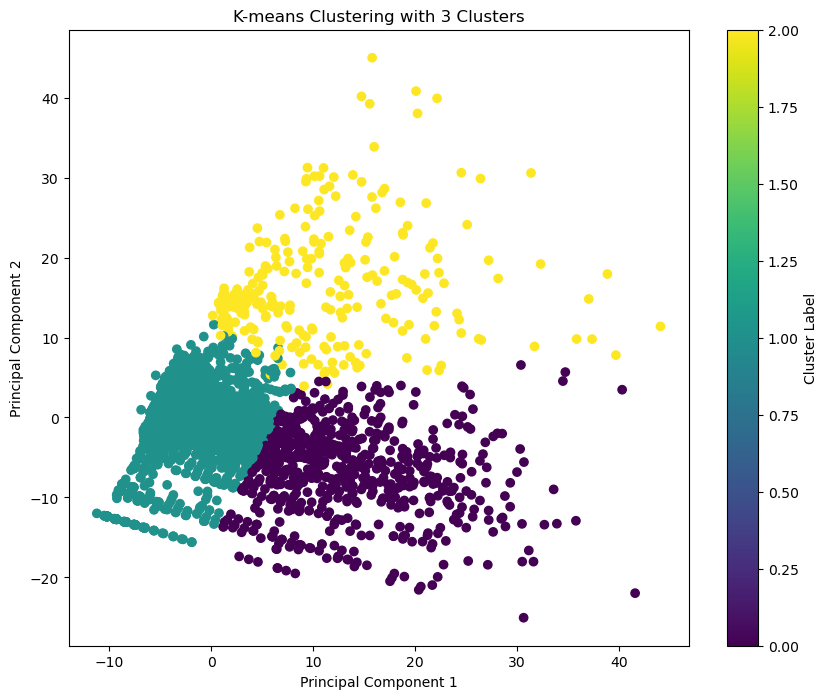

In [50]:
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
clusters = kmeans.fit_predict(all_features_df)

continuous_columns = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
# adding cluster info to the DataFrame
df['Cluster'] = clusters

# evaluate the clustering
silhouette_avg = silhouette_score(all_features_df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# analyze the clusters
# For example, calculate mean values of continuous variables for each cluster
cluster_analysis = df.groupby('Cluster')[continuous_columns].mean()
print(cluster_analysis)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(all_features_df)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-means Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.3068612230043697


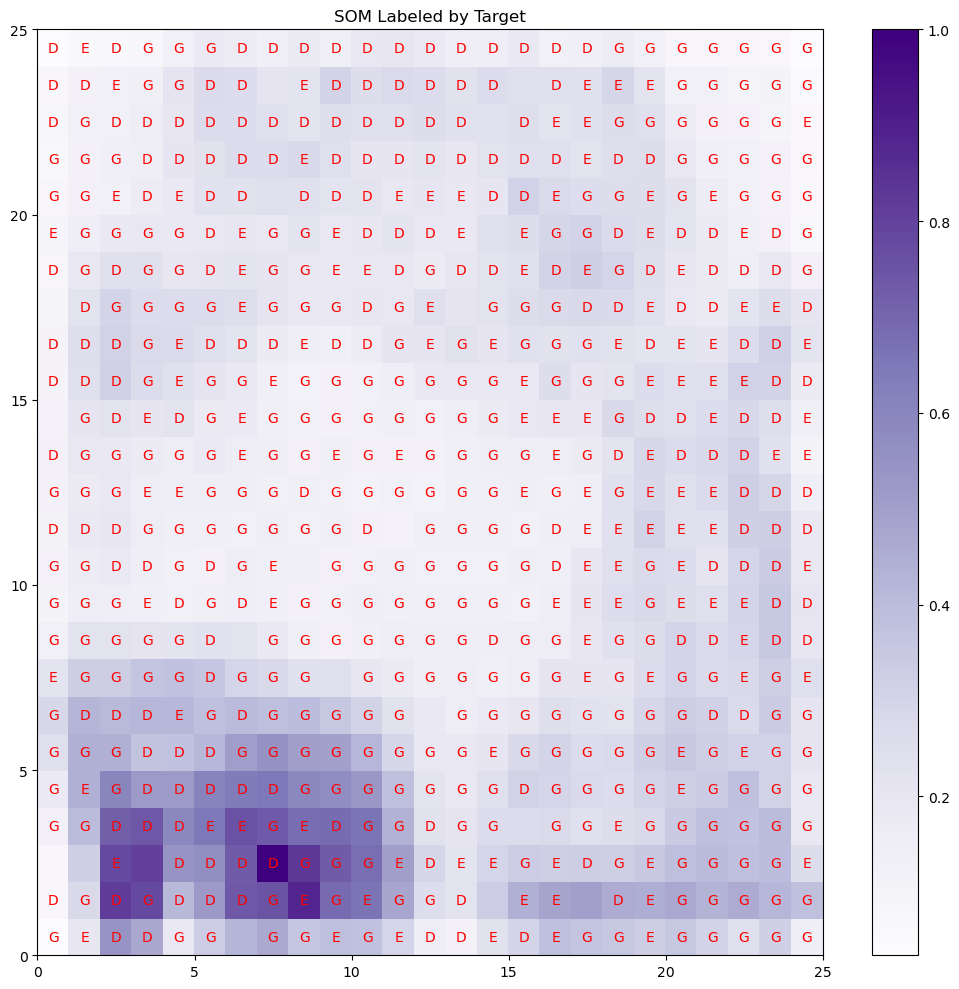

In [51]:
from sklearn.preprocessing import StandardScaler

df_som = OHE_df.copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_features_df)

som_grid_size = (20, 20)  # Increased grid size
sigma = 1.5  # Adjusted neighborhood function
learning_rate = 0.7  # Learning rate
num_iterations = 5000  # More iterations

# train the SOM
som_grid_size = (25, 25)  # may be adjusted
som = MiniSom(som_grid_size[0], som_grid_size[1], input_len=all_features_df.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(all_features_df.values)
som.train_batch(all_features_df.values, num_iterations, verbose=True)

# mapping dictionary
label_mapping = {'Graduate': 'G', 'Enrolled': 'E', 'Dropout': 'D'}

# find the nearest sample and majority class for each neuron in the SOM
winner_coordinates = np.array([som.winner(x) for x in all_features_df.values])
unique_neurons = np.unique(winner_coordinates, axis=0)

target_class = {}
for neuron in unique_neurons:
    indices = np.where((winner_coordinates == neuron).all(axis=1))[0]
    target_label = df_som.iloc[indices[0]]['Target']
    target_class[tuple(neuron)] = label_mapping.get(target_label, target_label)  # Map to single letter

# K-means clustering
weights = som.get_weights().reshape((som_grid_size[0] * som_grid_size[1], all_features_df.shape[1]))
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(weights)

# get cluster labels from kmeans
labels = kmeans.labels_.reshape(som_grid_size[0], som_grid_size[1])

plt.figure(figsize=(20, 10))

# SOM labeled by nearest sample name
plt.subplot(1, 2, 1)
plt.pcolor(som.distance_map().T, cmap='Purples')  # Color based on distance
plt.colorbar()
for neuron, name in target_class.items():
    plt.text(neuron[1] + 0.5, neuron[0] + 0.5, name, color='red', ha='center', va='center', fontsize=10)
plt.title('SOM Labeled by Target')

plt.tight_layout()
plt.show()

In [52]:

# Helper functions

# Data Normalisation
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Euclidean distance
def e_distance(x,y):
    return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
    return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data[t])
            if distance < shortest_distance: 
                shortest_distance = distance
                winner = [row,col]
    return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_distance):
    coefficient = 1.0 - (np.float64(step)/max_steps)
    learning_rate = coefficient*max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_distance)
    return learning_rate, neighbourhood_range


In [55]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_distance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [57]:
from math import ceil
from scipy.spatial import distance
from matplotlib.colors import ListedColormap

#main function
train_x = X_train.copy()
train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
    if (step+1) % 1000 == 0:
        learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_distance)

t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
for row in range(num_rows):
    for col in range(num_cols):
        if m_distance([row,col],winner) <= neighbourhood_range:
            som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

SOM training completed


In [58]:
train_y = y_train.copy()
label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
        print("sample data: ", t+1)
        winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
        map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000
sample data:  2000
sample data:  3000


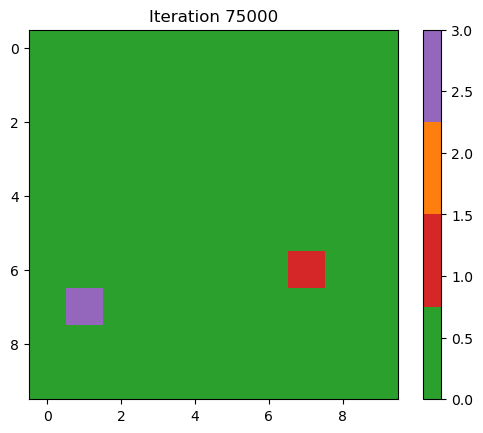

In [59]:
# construct label map
label_to_int = {'Dropout': 1, 'Enrolled': 2, 'Graduate': 3}
default_value = 0 

label_map = np.zeros((num_rows, num_cols), dtype=int)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list) == 0:
            label = default_value  # or some default value
        else:
            label_str = max(label_list, key=label_list.count)
            label = label_to_int.get(label_str, default_value)  # Convert string to integer
        label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = ListedColormap(['tab:green', 'tab:red', 'tab:orange', 'tab:purple'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [60]:
test_x = X_test.copy()
test_y = y_test.copy()
data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    predicted = label_map[row][col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.0
